# Spam detection

**Table of contents**
- [Introduction:Business Problem](#introduction)
- [Data](#data)
- [Methodology](#methodology)
- [Analysis](#analysis)
- [Results](#results)
- [Conclusion](#conclusion)

## Introduction:Business Problem <a name="introduction"></a>

There are many classifation models.These models also have different parameters that affect the accuracy of the model.The goal for this Spam detection app, is as use as a teaching aid to show felow Data scientists the effectiveness of hypertunning in machine learning projects.

## Data <a name="data"></a>

Our data is from kaggale.In this Data set for the Target colum(Spam or Ham), **spam** = 1 and **ham** = 0

We are going to have 4 models:
- knn
- Logistic Regression
- SVM
- Random Forests

## Methodology <a name="methodology"></a>

Before we use any ML model, we with first do some **data preprocessing**:
1. set target and features
2. standard scaler
3. column transformer
4. train test split

Then we will perform the following steps:

**1.KNN**

1. Find best K value
2. create pipeline and cross validated
3. Fit the model with a range of K values
4. Model prediction

**2.Logistic Regression**

1. create pipeline and cross validated
2. Model prediction

**3.SVM**

1. Find initial SVC 
2. Then gridsearch params(Find best parameters)
3. Pipeline cross validated
4. Fit model with a range of parameters
5. Model Prediction

**4.Random Forests**

1. Gridsearch params(Find best parameters)
2. Pipeline cross validated
3. Fit model with a range of parameters
4. Model Prediction

## Analysis <a name="analysis"></a>

**Data Preprocessing**
1. set target and features
2. standard scaler
3. column transformer
4. train test split

**Imports that work throughout the project**

In [1]:
import numpy as np
import pandas as pd

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. Targets and Features

In [3]:
email = pd.read_csv("emails.csv")

In [4]:
# target and features #
X = email.drop(labels=["Email No.","Prediction"], axis=1)
y = email["Prediction"]

2. Standard Scaler

In [5]:
# Standard scaler #
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

3. Column Transformer

In [6]:
# column transformer #
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer(
    (StandardScaler(), X.columns)
)

column_trans.fit_transform(X)

array([[-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       [ 0.11575699,  0.71450797,  1.33733653, ..., -0.0562853 ,
         0.03067224, -0.07097072],
       [-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       ...,
       [-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       [-0.3951477 ,  0.0851585 , -0.2938948 , ..., -0.0562853 ,
         0.03067224, -0.07097072],
       [ 1.30786793,  1.86831533, -0.0102024 , ..., -0.0562853 ,
        -0.32904848, -0.07097072]])

3. Train Test Split

In [7]:
# Train test split #
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
# cross validation #
from sklearn.model_selection import cross_val_score

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# FUNCTIONS TO GET MODEL OUTPUT #
# convert list to df #
def make_list_to_df(list_to_convert, cols):
    df = pd.DataFrame(columns=cols)
    df.loc[len(df)] = list_to_convert

    return df

# creating a vector from user input
def vectorize_data(data_entry, vocabulary):
    # make sure the voca is a list
    vocab = list(vocabulary)
    pipe_user_data = make_pipeline(CountVectorizer(vocabulary=vocab))
    new_email = pipe_user_data.fit_transform([data_entry]).toarray()
    return new_email[0]


**1.KNN**

1. Find best K value

In [10]:
# KNN #
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# Finding k elbow method #
error_rate2 = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate2.append(np.mean(pred_i != y_test))

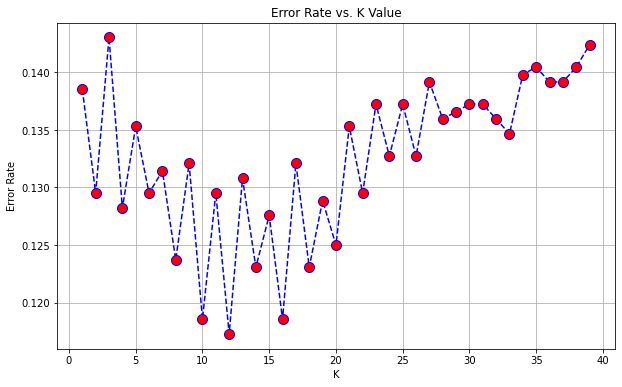

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate2,color="blue", linestyle="dashed", marker="o",markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid()

## Insert KNN graph here

2. create pipeline and cross validated


In [16]:
# Building a Pipeline #
from sklearn.pipeline import make_pipeline

In [17]:
knn = KNeighborsClassifier(n_neighbors=12)
pipe_knn = make_pipeline(column_trans, knn)
np.mean(cross_val_score(pipe_knn,X_train,y_train, scoring = 'accuracy', cv= 3))

0.7113264571004868

3. Fit the model with a range of K values

In [20]:
#if add_selectbox_algo == "knn":
#    knn_value = st.sidebar.slider('Select a K value', 0, 15)
#    knn = KNeighborsClassifier(knn_value)
#    pipe_knn = make_pipeline(column_trans, knn)
#    knn_acc = np.mean(cross_val_score(pipe_knn, X_train,
#                      y_train, scoring='accuracy', cv=3))
#
#    st.write("knn model accuracy: ", knn_acc)

[View App for more detail]("link here")


4. Model prediction

In [21]:
#knn_model = pipe_knn.fit(X_train, y_train)
#result = knn_model.predict(new_email_df)

**2.Logistic Regression**

1. create pipeline and cross validated

In [22]:
# Logistic Regression #
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

pipe_lg = make_pipeline(column_trans,lg)

np.mean(cross_val_score(pipe_lg,X_train,y_train,scoring="accuracy", cv=3))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9665751148519576

2. Model prediction

In [23]:
#lg_model = pipe_lg.fit(X_train, y_train)
#result = lg_model.predict(new_email_df)

**3.SVM**

1. Find initial SVC

In [24]:
# initial SVC #
from sklearn.svm import SVC
svm = SVC()
pipe_svm = make_pipeline(column_trans, svm)

np.mean(cross_val_score(pipe_svm,X_train,y_train, scoring = 'accuracy', cv= 3))

0.9082842255627872

2. Then gridsearch params(Find best parameters)

In [25]:
# Using gridsearch to find the best params for SVC #
from sklearn.model_selection import GridSearchCV

In [26]:
## make a dictionary of the parameters you want to search through #
#param_grid = {"C":[0.1,1,10],"gamma":['scale', 'auto']}

## creating a gridsearch with svm #
#grid = GridSearchCV(SVC(),param_grid,verbose=3)

## fitting model to training data #
#grid.fit(X_train,y_train)

In [27]:
#grid.best_params

3. Pipeline cross validated

In [28]:
svm = SVC(C=10, gamma="scale")
pipe_svm = make_pipeline(column_trans, svm)

np.mean(cross_val_score(pipe_svm,X_train,y_train, scoring = 'accuracy', cv= 3))

0.9505524023077103

4. Fit model with a range of parameters

In [36]:
#svm = SVC(C=C_value, gamma=gamma_value)
#pipe_svm = make_pipeline(column_trans, svm)

#svm_acc = np.mean(cross_val_score(pipe_svm, X_train,y_train, scoring='accuracy', cv=3))

[View App for more detail](https://github.com/victorbahlangene/spamsteamlitapp/blob/main/app.py)

5. Model Prediction

In [30]:
#svm_model = pipe_svm.fit(X_train, y_train)
#result = svm_model.predict(new_email_df)

**4.Random Forests**

1. Gridsearch params(Find best parameters)

In [33]:
# Random forest #
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc_params={
 'bootstrap': [True,False],
 'max_depth': [10,20,30,40,50,60,70,80,90,100,None],
 'max_features': ['auto','sqrt'],
 'min_samples_leaf': [1,2,4],
 'min_samples_split': [2,5,10],
 'n_estimators': [200,400,600,800,1000,1200,1400,1600,1800,2000]
}

In [32]:
## creating a gridsearch with svm #
#grid_rcf = GridSearchCV(RandomForestClassifier(),rfc_params,verbose=3)

## fitting model to training data #
#grid_rcf.fit(X_train,y_train)

In [ ]:
#grid.best_params

2. Pipeline cross validated


In [34]:
rfc = RandomForestClassifier(n_estimators=200)
pipe_rf = make_pipeline(column_trans, rfc)

np.mean(cross_val_score(pipe_rf,X_train,y_train, scoring = 'accuracy', cv= 3))

0.9668508236686401

3. Fit model with a range of parameters

In [35]:
#rfc_params = {
#        'bootstrap': bootstrap_val,
#        'max_features': max_features_val,
#        'min_samples_leaf': min_samples_leaf_val,
#        'min_samples_split': min_samples_split_val,
#        'n_estimators': n_estimators_val
#    }
##rfc = RandomForestClassifier(rfc_params)
#rfc = RandomForestClassifier(n_estimators=200)
#pipe_rfc = make_pipeline(column_trans, rfc)

#rfc_acc = np.mean(cross_val_score(pipe_rfc, X_train,
#                  y_train, scoring='accuracy', cv=3))

[View App for more detail](https://github.com/victorbahlangene/spamsteamlitapp/blob/main/app.py)

4. Model Prediction

In [37]:
#rfc_model = pipe_rfc.fit(X_train, y_train)
#result = rfc_model.predict(new_email_df)

## Results <a name="results"></a>

From the analysis we observe that the Random Forest Classifer is the best model, and KNN is the worst. This is to be expected because the KNN model is best for small data samples, and Random Forest Classifer is best for larger Data sources.

## Conclusion <a name="Conclusion"></a>

We could improve the test by using sklearn nltk or sklearn naive_bayes

From our analysis the clasification model was the better model.
To view the applicaion via streamlit libriary:
- [app](https://share.streamlit.io/victorbahlangene/spamsteamlitapp/main/app.py)
- [code for app](https://github.com/victorbahlangene/SpamSteamlitApp)